[![Instgram Badge](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1KTcM4KX3BwA5ROf9oduAHKxqFNBJ6rQE?usp=share_link)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 53.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
tree = pd.read_csv("/content/drive/MyDrive/trees.csv")

In [4]:
tree.head()

,Address,Suffix,Street,Side,Site,On Street,X,Y,Latitude,Longitude,...,Species,Diameter,Location,Area,Cultivar,Growspace,Height,MultiStem,Overhead Utilities,Space Size
0,21,NaN,Abbott St,Front,1,Abbott St,1008714.290,770748.5116,42.113418,-75.888560,...,Vacant site small (vacant site small),0.0,Street,Street,NaN,Tree Lawn/Parkway,0 to 20,No,No,4.0
1,24,NaN,Abbott St,Side Away,1,Louisa St,1008802.294,770683.4858,42.113237,-75.888238,...,Vacant site small (vacant site small),0.0,Street,Street,NaN,Tree Lawn/Parkway,0 to 20,No,Yes,4.0
2,24,NaN,Abbott St,Side Away,2,Louisa St,1008805.228,770638.0167,42.113113,-75.888228,...,Vacant site small (vacant site small),0.0,Street,Street,NaN,Tree Lawn/Parkway,0 to 20,No,Yes,4.0
3,25,NaN,Abbott St,Front,1,Abbott St,1008762.203,770753.8897,42.113432,-75.888383,...,"maple, Norway (Acer platanoides)",30.0,Street,Street,NaN,Tree Lawn/Parkway,51 to 60,No,No,4.0
4,26,NaN,Abbott St,Front,1,Abbott St,1008868.024,770727.8470,42.113358,-75.887994,...,Vacant site small (vacant site small),0.0,Street,Street,NaN,Tree Lawn/Parkway,0 to 20,No,Yes,3.0


In [5]:
from shapely.geometry import Point 

In [8]:
geometry = [Point(xy) for xy in zip(tree['Longitude'], tree['Latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(tree, crs=crs, geometry=geometry)

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [9]:
gdf.head()

,Address,Suffix,Street,Side,Site,On Street,X,Y,Latitude,Longitude,...,Diameter,Location,Area,Cultivar,Growspace,Height,MultiStem,Overhead Utilities,Space Size,geometry
0,21,NaN,Abbott St,Front,1,Abbott St,1008714.290,770748.5116,42.113418,-75.888560,...,0.0,Street,Street,NaN,Tree Lawn/Parkway,0 to 20,No,No,4.0,POINT (-75.88856 42.11342)
1,24,NaN,Abbott St,Side Away,1,Louisa St,1008802.294,770683.4858,42.113237,-75.888238,...,0.0,Street,Street,NaN,Tree Lawn/Parkway,0 to 20,No,Yes,4.0,POINT (-75.88824 42.11324)
2,24,NaN,Abbott St,Side Away,2,Louisa St,1008805.228,770638.0167,42.113113,-75.888228,...,0.0,Street,Street,NaN,Tree Lawn/Parkway,0 to 20,No,Yes,4.0,POINT (-75.88823 42.11311)
3,25,NaN,Abbott St,Front,1,Abbott St,1008762.203,770753.8897,42.113432,-75.888383,...,30.0,Street,Street,NaN,Tree Lawn/Parkway,51 to 60,No,No,4.0,POINT (-75.88838 42.11343)
4,26,NaN,Abbott St,Front,1,Abbott St,1008868.024,770727.8470,42.113358,-75.887994,...,0.0,Street,Street,NaN,Tree Lawn/Parkway,0 to 20,No,Yes,3.0,POINT (-75.88799 42.11336)


<Axes: >

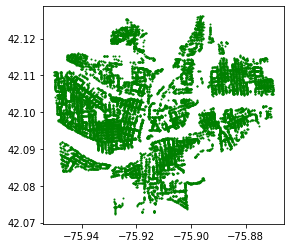

In [12]:
gdf.plot(marker='o', color='g', markersize= 1)